In [1]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())
from path import Path
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

1.0.1.post2
True


In [2]:
from torch import nn
import numpy as np
from torch import nn
import torch.nn.functional as F

In [3]:
import os
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
df=pd.DataFrame()
azz={}

In [4]:
def plot_roc(y_test,y_score,n_classes):
    #y_test=N_elements
    #y_score=N_elements X N_classes
#     fpr = dict()
#     tpr = dict()
    y_test = label_binarize(y_test, classes=[0, 1, 2])
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    plt.figure()
    lw = 2
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])


    # Plot all ROC curves
    plt.figure()
    plt.plot(fpr["micro"], tpr["micro"],
             label='micro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["micro"]),
             color='deeppink', linestyle=':', linewidth=4)
    azz['fpr']=fpr['macro']
    azz['tpr']=tpr['macro']

    plt.plot(fpr["macro"], tpr["macro"],
             label='macro-average ROC curve (area = {0:0.2f})'
                   ''.format(roc_auc["macro"]),
             color='navy', linestyle=':', linewidth=4)
    print(fpr['macro'].shape,tpr['macro'].shape,roc_auc["macro"])

    colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('MLP  FOR  BCLL  DATASET')
    plt.legend(loc="lower right")
    plt.show()



In [5]:
seed=4
df=pd.read_csv("preprocessed_BCLL.csv")
no_of_rows,no_of_cols=df.shape
print (no_of_rows,no_of_cols)
df.head()
df

4655 23


,A,B,C,D,E,F,G,H,I,J,...,N,O,P,Q,R,S,T,U,V,W
0,1009_at,HINT1,1145.5,1014.9,1103.1,850.4,886.6,859.3,1228.6,1231.9,...,763.7,1382.4,1008.2,1025.9,1197.0,735.2,865.3,485.0,811.1,783.0
1,100_g_at,RABGGTA,169.0,200.6,196.3,151.4,167.8,111.3,164.9,240.6,...,277.2,172.7,163.6,194.0,117.1,130.5,164.2,212.2,108.4,114.7
2,1011_s_at,YWHAE,25.9,31.7,43.3,40.9,40.8,26.7,45.1,62.0,...,12.5,53.6,72.8,59.6,33.3,35.8,45.3,68.0,56.7,39.3
3,1012_at,KAT2B,28.0,34.4,13.2,28.3,15.7,56.5,35.2,25.0,...,20.4,11.6,15.9,5.9,18.2,28.8,55.0,35.9,25.2,18.8
4,1013_at,SMAD5,17.2,3.0,6.0,9.9,10.0,16.7,1.5,10.0,...,1.4,6.5,12.3,11.3,9.2,2.1,4.7,1.3,5.4,3.8
5,1018_at,WNT10B,20.4,50.2,47.4,33.0,39.7,20.4,27.2,27.2,...,90.6,36.1,35.4,17.7,27.9,83.9,24.3,29.4,42.7,37.5
6,1019_g_at,WNT10B,104.6,40.2,63.3,69.6,81.8,54.6,53.4,38.5,...,156.4,59.8,48.9,70.3,65.5,127.4,52.5,147.2,105.0,84.8
7,1020_s_at,CIB1,510.1,490.4,528.6,645.6,728.9,446.9,500.7,562.4,...,352.8,423.8,707.6,521.2,597.9,556.3,654.4,368.4,523.4,362.7
8,1025_g_at,CYP1A1,31.7,23.9,25.5,19.9,39.4,21.6,17.9,19.5,...,56.0,18.8,27.0,15.5,19.2,44.6,35.9,54.8,22.9,27.0
9,1029_s_at,TXK,16.9,7.6,18.4,14.3,18.6,14.1,13.3,14.6,...,14.8,13.6,5.3,9.8,3.8,26.6,8.3,2.3,19.5,1.8


In [6]:
header_of_pd=['C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W']
X=np.array(df[header_of_pd])
#X=X.astype(np.float)
print(X.shape)

(4655, 21)


In [7]:
print(X)

[[1145.5 1014.9 1103.1 ...  485.   811.1  783. ]
 [ 169.   200.6  196.3 ...  212.2  108.4  114.7]
 [  25.9   31.7   43.3 ...   68.    56.7   39.3]
 ...
 [   2.5    9.     5.  ...   15.7    5.9    2.7]
 [   1.3    2.1    3.9 ...    2.1    1.3    1.7]
 [  23.1    1.4   14.3 ...    6.3   14.8    2.2]]


In [8]:
fil=open('label0.txt','r')
tmp=list()
for line in fil:
	tmp.append(int(line))

Y=np.array(tmp)
print(len(Y))

4655


In [9]:
augmented_X=[]
augmented_Y=[]
a=0
b=0
c=0
d=0
choice=0
t=0
for i in Y:
    if i==0:
        
        choice=60
        a=a+choice
    elif i==1:
        choice=9
        b=b+choice
    elif i==2:
        choice=1
        c=c+choice
    else:
        choice=1
        d=d+choice
    for u in range(choice):
        augmented_X.append(X[t])
        augmented_Y.append(Y[t])
    t=t+1
    
print(a,b,c,d)
augmented_X=np.array(augmented_X)
augmented_Y=np.array(augmented_Y)

4260 4185 4119 0


In [10]:
X_train,X_test,Y_train,Y_test=train_test_split(augmented_X,augmented_Y,test_size=0.20,random_state=2)
print(X_test.shape)
print(X_test[0])


(2513, 21)
[21.8 17.2 20.4 13.3 13.8 30.6 18.9 17.1 34.9 29.  11.8 14.6 25.2 15.5
 13.8 26.1 13.6 29.4 17.8 32.3 20.9]


In [11]:
class Net(torch.nn.Module):
    def __init__(self, n_feature,out_features):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature,900)
        self.hidden2 = torch.nn.Linear(900,600)
        self.hidden3 = torch.nn.Linear(600,400)
        self.hidden4 = torch.nn.Linear(400,100)
        self.hidden5 =torch.nn.Linear (100,10)
        self.predict = torch.nn.Linear(10,out_features)
        self.bn1 = nn.BatchNorm1d(num_features=900)
        self.bn2 = nn.BatchNorm1d(num_features=600)
        self.bn3 = nn.BatchNorm1d(num_features=400)
        self.bn4 = nn.BatchNorm1d(num_features=100)
        self.bn5 = nn.BatchNorm1d(num_features=10)
    def forward(self, x):
        x = F.relu(self.hidden1(x))
#         x=self.bn1(x)
        x = F.relu(self.hidden2(x))
#         x=self.bn2(x)
        x =F.relu(self.hidden3(x))
        x=self.bn3(x)
        x =F.relu(self.hidden4(x))
        x=self.bn4(x)
        x =F.relu(self.hidden5(x))
#         x=self.bn5(x)
        
        x=F.relu(self.predict(x))
        return x
def accurate():
    total = X_test.shape[0]
    x_test=torch.tensor(X_test,dtype=torch.float)
    y_test=torch.tensor(Y_test,dtype=torch.long)
    outputs = MP(x_test)
    _, predicted = torch.max(outputs.data, 1)
    correct = (predicted.cpu() == y_test).sum()
    confusion_matrix = torch.zeros(3, 3)
    print('Accuracy of the network on the test data: %d %%' % (100 * correct / total))
    for t, p in zip(y_test.view(-1), predicted.view(-1)):
        confusion_matrix[t.long(), p.long()] += 1
    print(confusion_matrix)

In [12]:
MP=Net(21,3)
#load stat
MP.load_state_dict(torch.load(Path('1MLP_BCLL.pt')))
total = X_test.shape[0]
x_test=torch.tensor(X_test,dtype=torch.float)
y_test=torch.tensor(Y_test,dtype=torch.long)
outputs = MP(x_test)
_, predicted = torch.max(outputs.data, 1)
correct = (predicted.cpu() == y_test).sum()
confusion_matrix = torch.zeros(3, 3)
print('Accuracy of the network on the test data: %d %%' % (100 * correct / total))
for t, p in zip(y_test.view(-1), predicted.view(-1)):
 confusion_matrix[t.long(), p.long()] += 1
print(confusion_matrix)

Accuracy of the network on the test data: 89 %
tensor([[707., 109.,  35.],
        [ 23., 760.,  50.],
        [  0.,  55., 774.]])


In [13]:
 print(outputs.shape,y_test.shape)

torch.Size([2513, 3]) torch.Size([2513])


(270,) (270,) 0.9563931576167036


<Figure size 432x288 with 0 Axes>

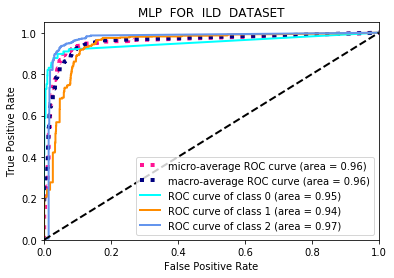

In [14]:
plot_roc(y_test.numpy(),outputs.detach().numpy(),3)

In [15]:

dataset = pd.DataFrame({'fpr':azz['fpr'],'tpr':azz['tpr']})

In [16]:
dataset.to_csv('bcll_mlp_roc.csv')